In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
#!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
import time

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [5]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

Step 1: Explore the Dataset 

In [158]:
df.head(25)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [8]:
df.columns #column names for future reference

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [9]:
df.isnull().sum() #total number of missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [11]:
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Q1: Why does it make sense to discretize columns for this problem? 

The columns are discretized, or more commonly referred to as "binned", into several numerical categories or buckets for several reasons. The first and most obvious is to be able to derive numerical results from categorical variables which drastically simplifies the need for encoding. Furthermore, for our numerical values, like the age of an individual, having the bins helps prevent the model from being overly complex. Instead of having the model run through the potential outcomes for over 30 different variations of age (from 30-60 as an example), creating these categories helps us use attributes in a more meaningful way. Furthermore, when analyzing a new person entering the dataset, putting them in a bin for something like age will help with the accuracy of the model. If every single age in the dataset had the opportunity to derive one specific outcome, it would harm our chances of optimizing the decision tree. 

Q2: What might be the issues (if any) if we did not discrtize the columns. 

There are a few issues with not binning variables that have high variations (such as age). First of all, the model will have a higher risk of overfitting the dataset, since simple one-number variations in age for instance, would cause the decision tree itself to "overgrow". Further, such a large and complex modele would not only be difficult to run, but it would be also very difficult to apply to real-world scenarios, since the specifificity of the dataset would be most capable with our training dataset, not any new ones. 

Step 2: Data Quality Analysis using AutoViz 

In [13]:
AV = AutoViz_Class()
AV.AutoViz('',dfte=df)

Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 4001

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


As determined through the use of the auto visualization tool, there are no missing values across the 7 attributes in the dataset. Furthermore, there are no data quality issues flagged by autoviz, and the formatting of y (the results column) matches the expectations for a binary (Y/N) output.

Below are visualizations to help interpret the relationship between attributes. Template from code from CA01 EDA assignment was used for this portion of this assignment. 

In [15]:
%matplotlib inline

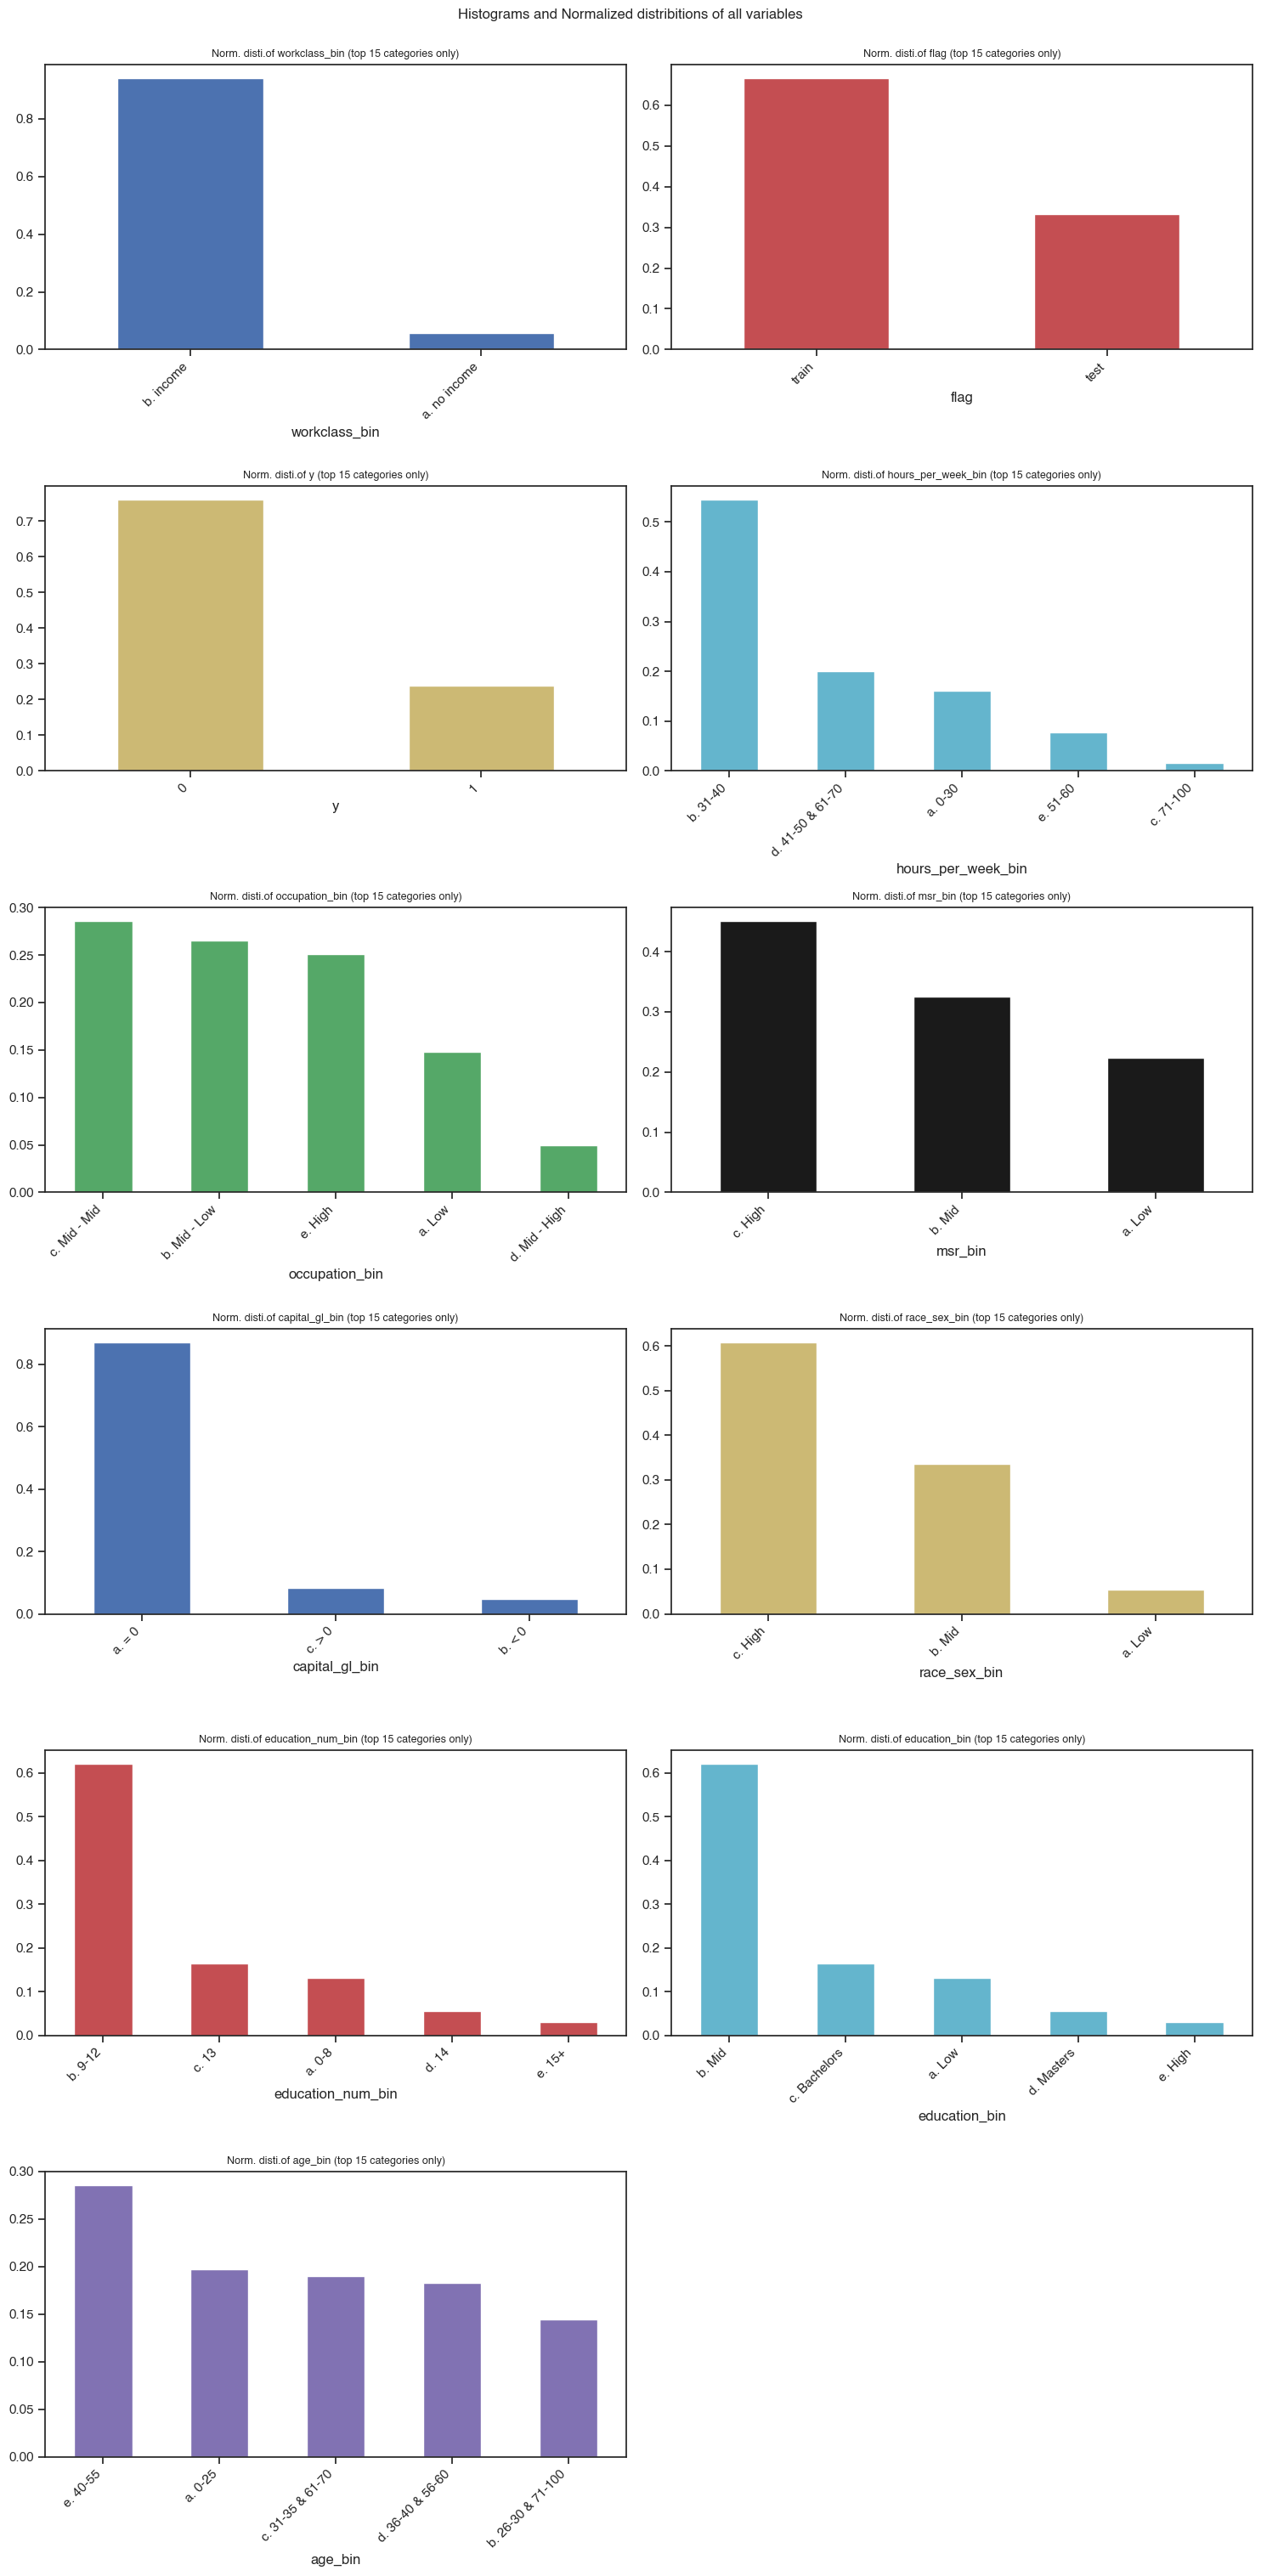

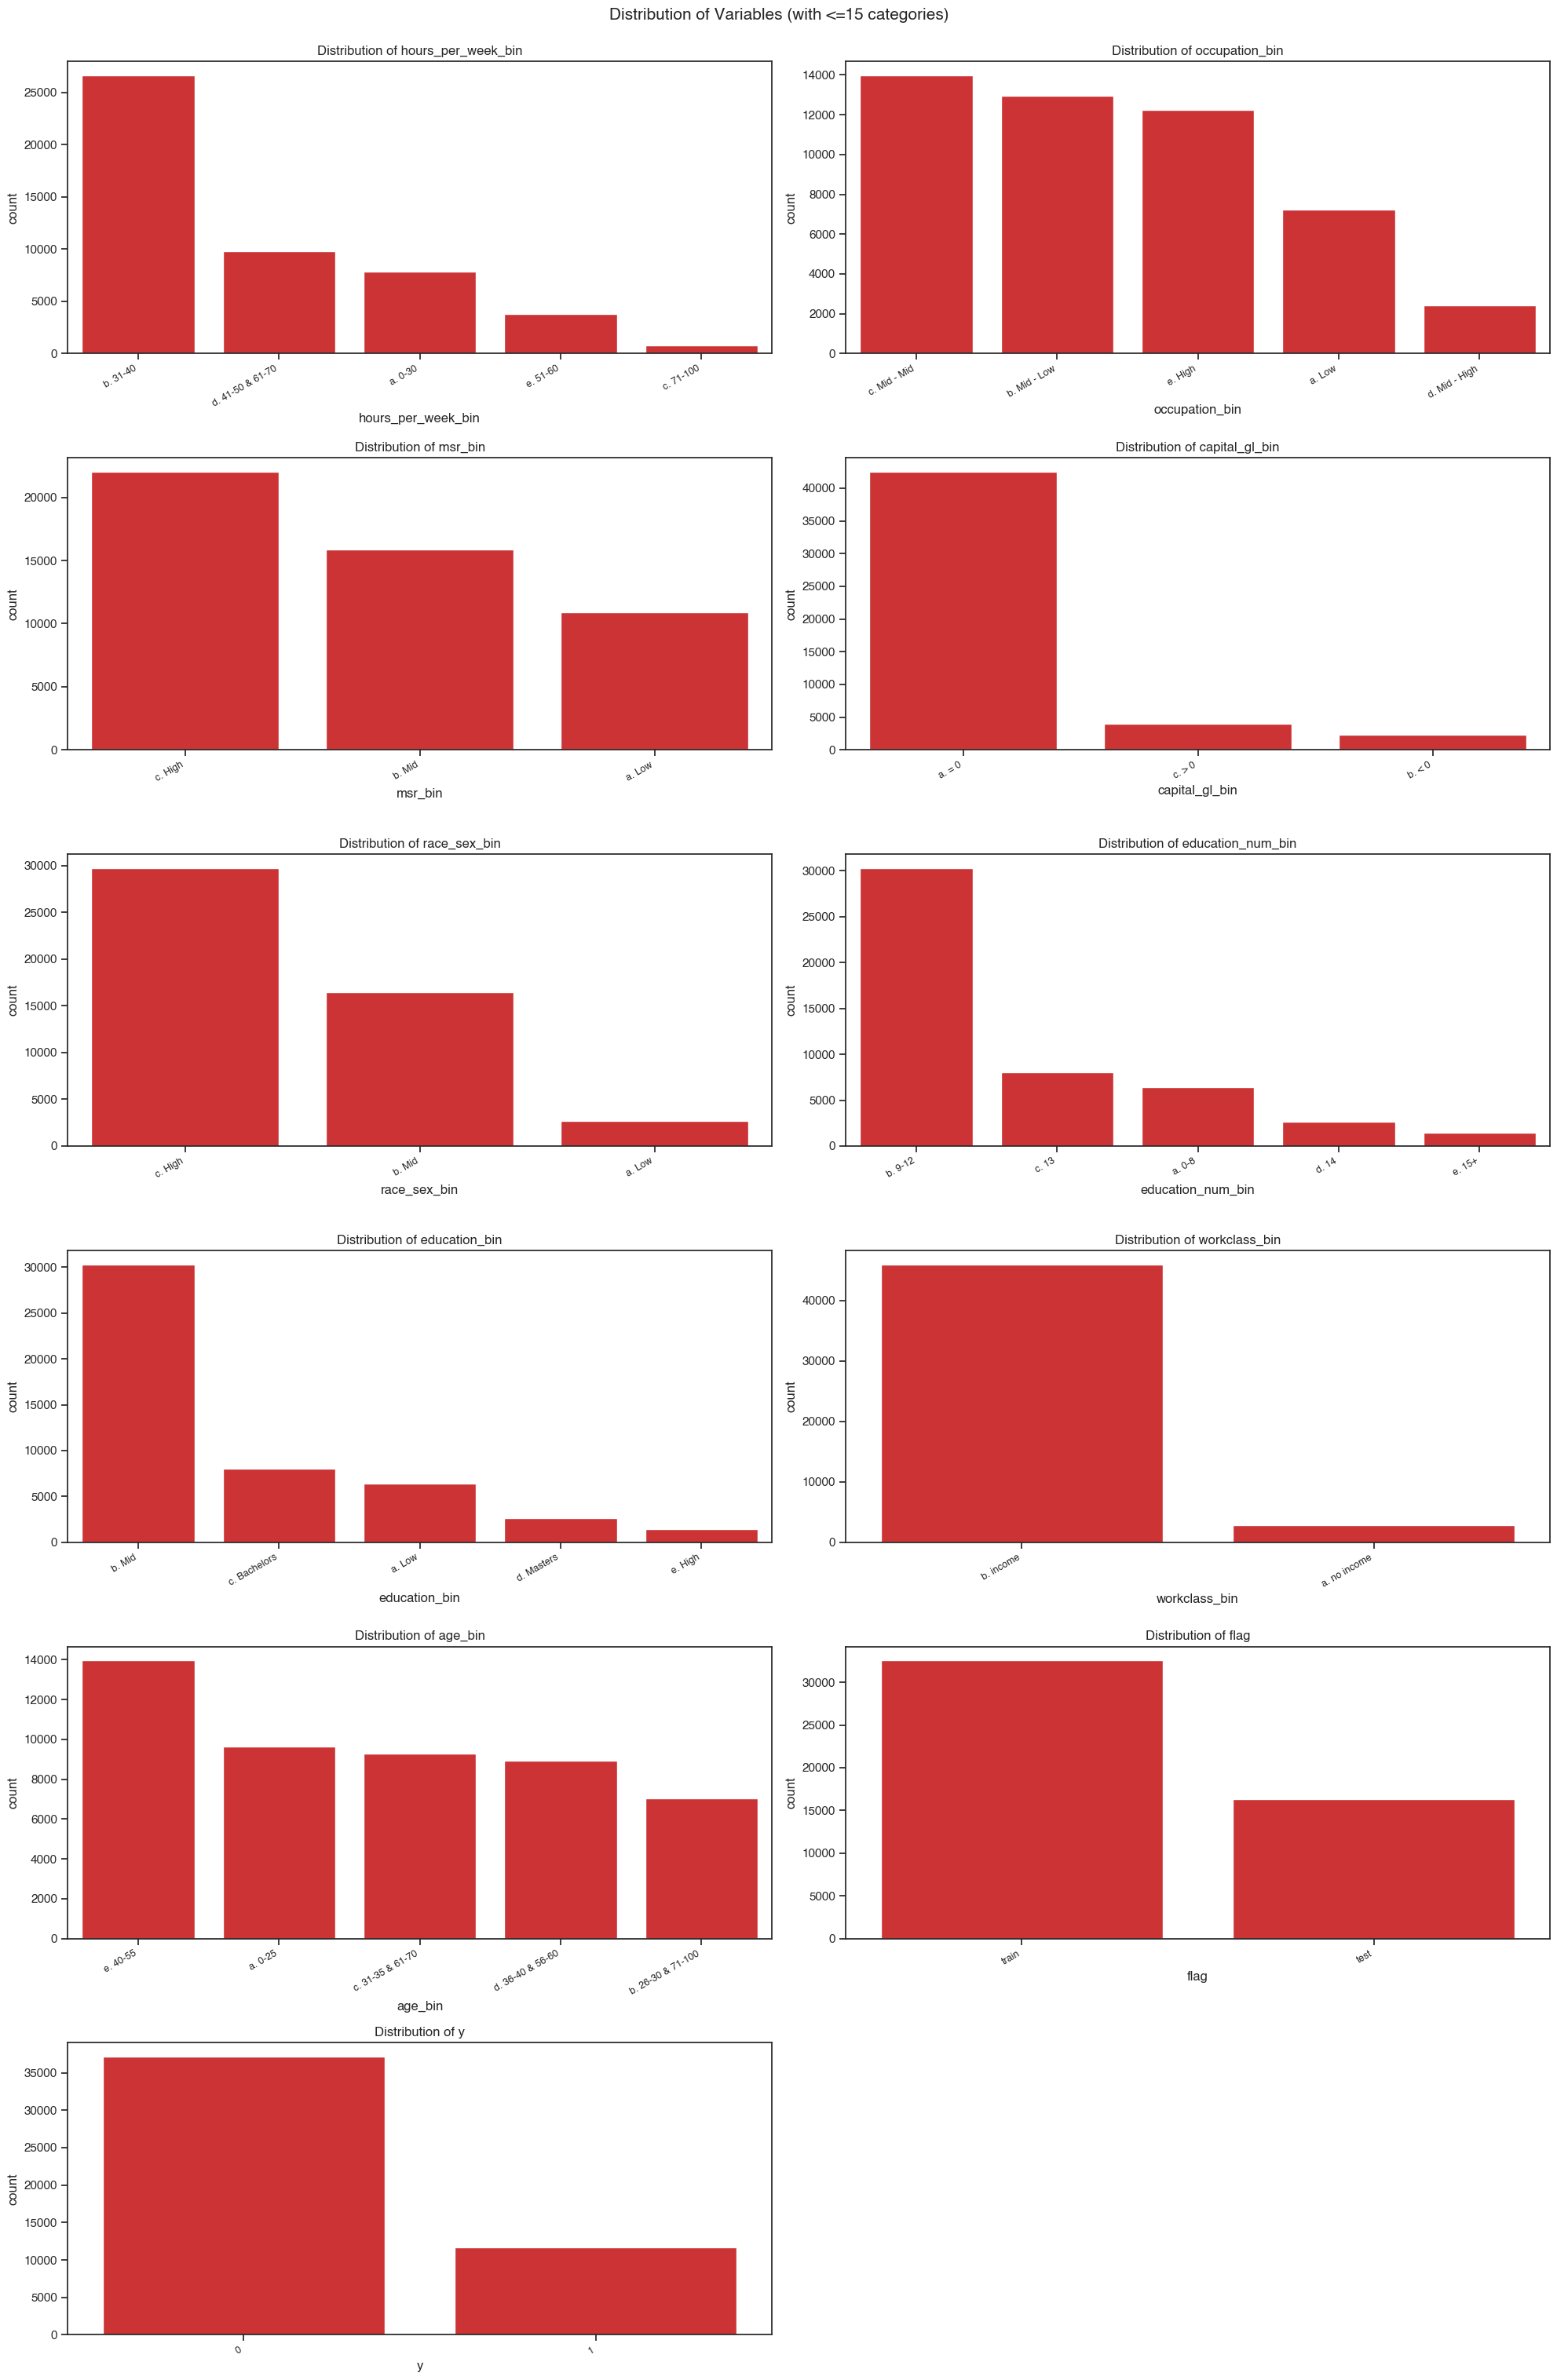

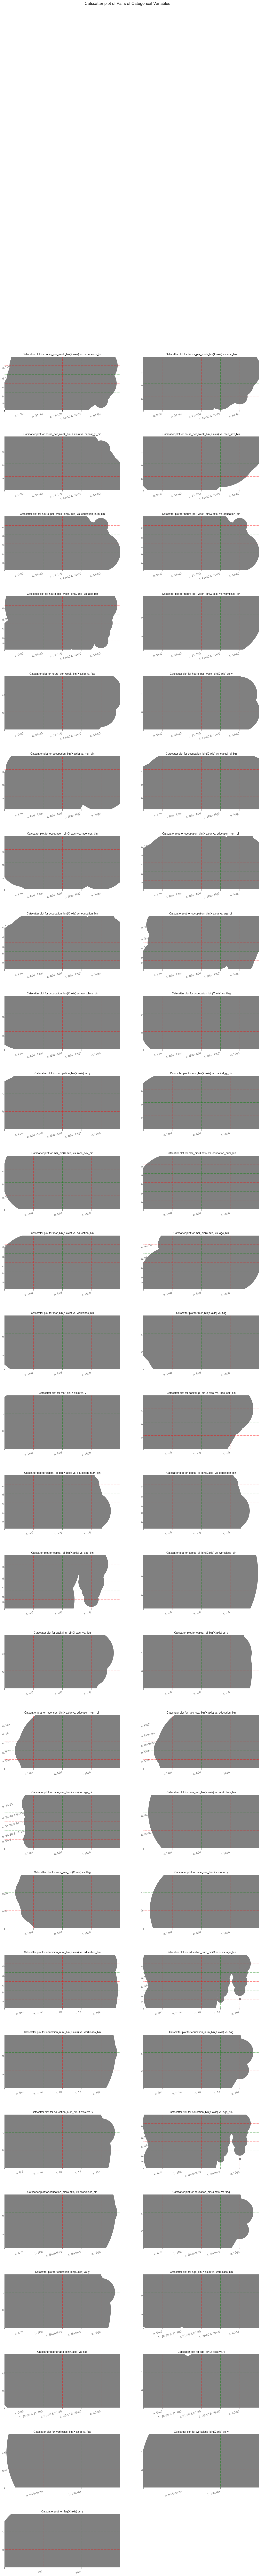

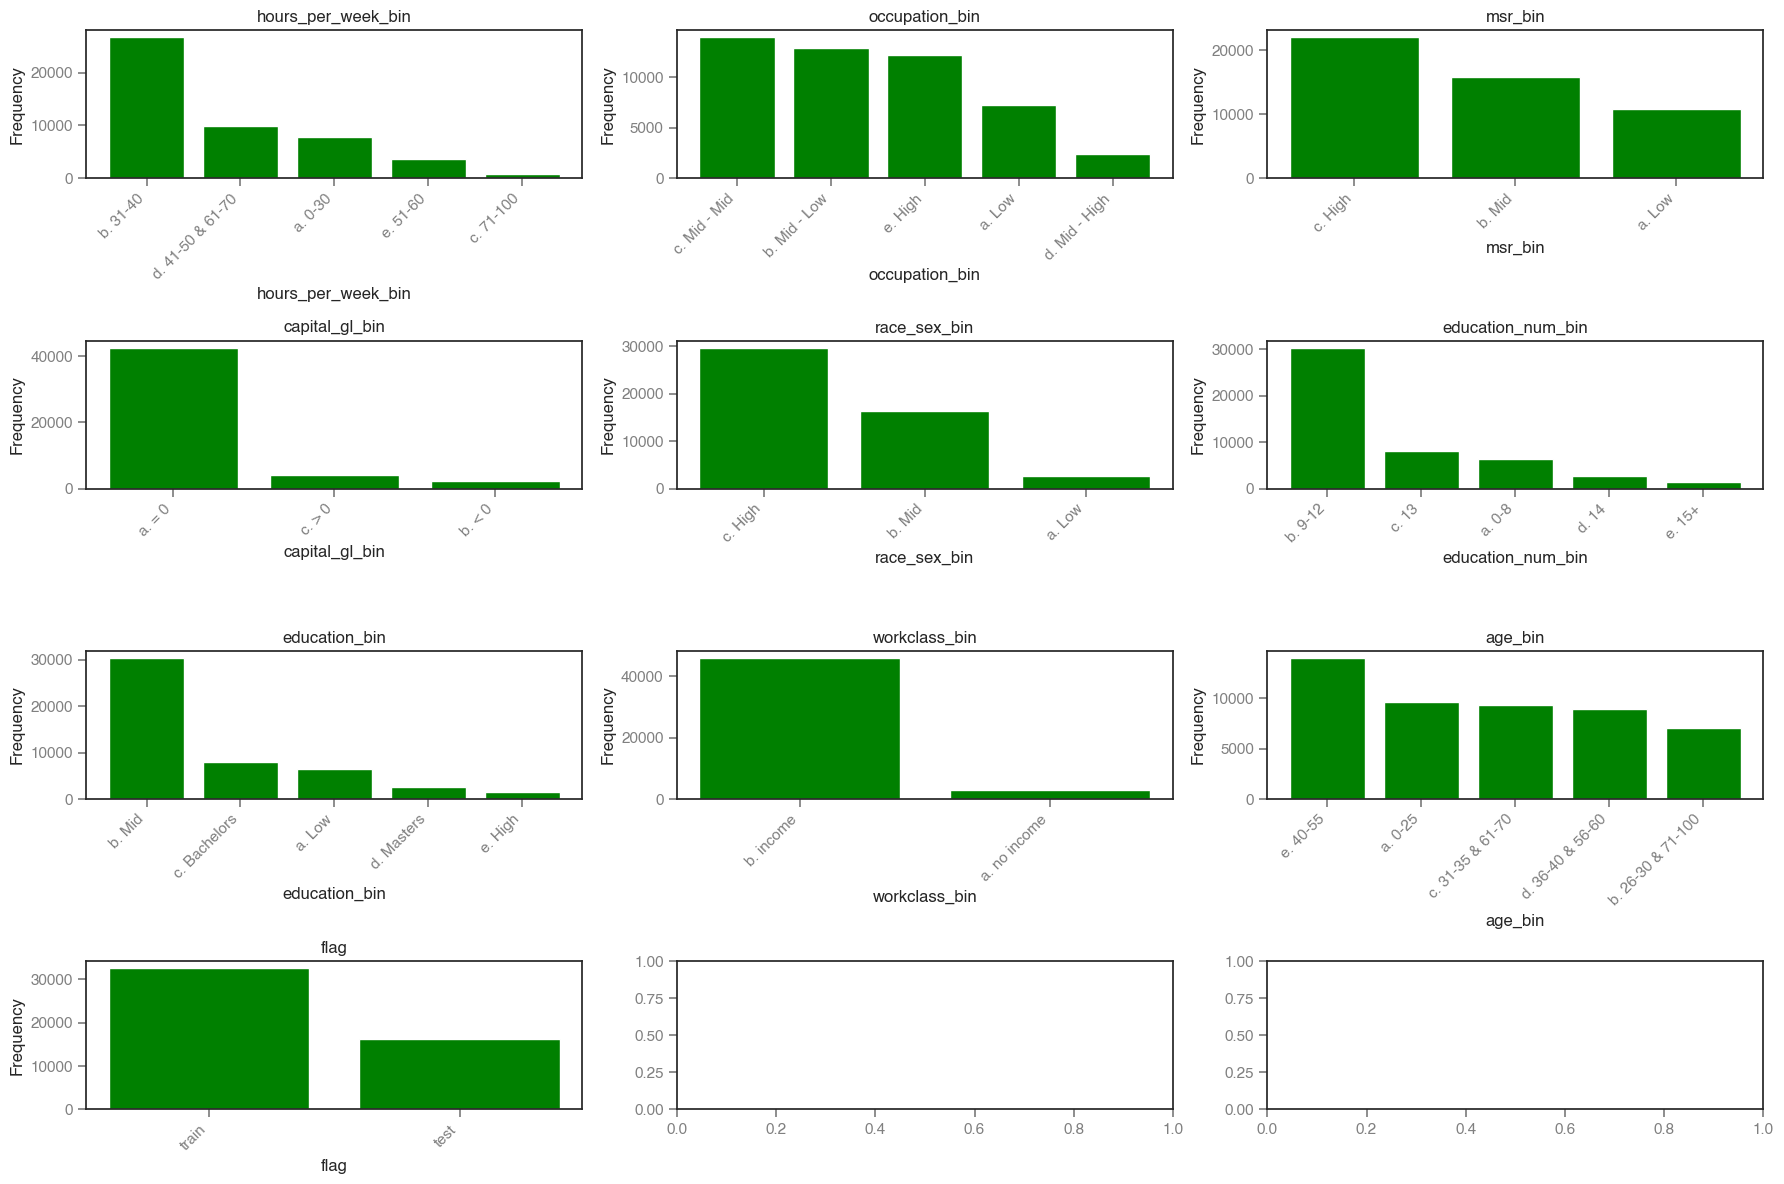

In [16]:
categorical_columns = df.select_dtypes(include = ['object']).columns.tolist() #creating list of all categorical columns

#improving layout of visualization 
num_cols = len(categorical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(18, 12))
axes = axes.flatten()

#creating loop for each column in the list of categorical variables 
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, color = 'green')
    axes[i].set_title(col)
    axes[i].set_xticklabels(value_counts.index, rotation = 45, ha = 'right')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() #further improvement of visual layout per AI
plt.show()

Since all columns are categorical, we can proceed without descriptive statistics. Using the information above, we can finalize a formal data quality report for the dataset. 

In [18]:
#creating formal data quality per expectations, using AI for standardized methodology

data_quality_report = pd.DataFrame({
    'Column Name': df.columns, 
    'Data Types': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Missing Values': df.isnull().sum().values,
    'Min Value': [df[col].min() if df[col].dtype != 'o' else 'N/A' for col in df.columns],
    'Max Value': [df[col].max() if df[col].dtype != 'o' else 'N/A' for col in df.columns],
}) #Outliers excluded since all attributes are categorical. 

display(data_quality_report)#displays report as dataframe

,Column Name,Data Types,Unique Values,Missing Values,Min Value,Max Value
0,hours_per_week_bin,object,5,0,a. 0-30,e. 51-60
1,occupation_bin,object,5,0,a. Low,e. High
2,msr_bin,object,3,0,a. Low,c. High
3,capital_gl_bin,object,3,0,a. = 0,c. > 0
4,race_sex_bin,object,3,0,a. Low,c. High
5,education_num_bin,object,5,0,a. 0-8,e. 15+
6,education_bin,object,5,0,a. Low,e. High
7,workclass_bin,object,2,0,a. no income,b. income
8,age_bin,object,5,0,a. 0-25,e. 40-55
9,flag,object,2,0,test,train


Since there are no outliers or missing values across the attributes being used, we can proceed to modeling without data cleaning or transformation needed. 

Step 3: Building Decision Tree Classifier Models 

In [20]:
#verify flag column for splitting training and test dataset accurately 
print(df.flag.unique())

['train' 'test']


In [21]:
#split the dataset into two separate dataframes
train_df = df[df.flag == 'train']
test_df = df[df.flag == 'test']

#test results 
test_df.flag.unique

<bound method Series.unique of 32561    test
32562    test
32563    test
32564    test
32565    test
         ... 
48837    test
48838    test
48839    test
48840    test
48841    test
Name: flag, Length: 16281, dtype: object>

In [22]:
train_df.flag.unique

<bound method Series.unique of 0        train
1        train
2        train
3        train
4        train
         ...  
32556    train
32557    train
32558    train
32559    train
32560    train
Name: flag, Length: 32561, dtype: object>

In [23]:
#drop flag column to prevent issues in the use of attributes
train_df = train_df.drop(columns=['flag'])
test_df = test_df.drop(columns=['flag'])


In [24]:
#define x_test, x_train, y_test, and y_train to build model 
y_train = train_df.y
y_test = test_df.y
x_train = train_df.drop(columns='y')
x_test = test_df.drop(columns='y')

y_train.shape

(32561,)

In [25]:
y_test.shape

(16281,)

In [26]:
x_train.shape

(32561, 9)

In [27]:
x_test.shape

(16281, 9)

In [28]:
x_train.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin'],
      dtype='object')

In [29]:
x_test.columns #testing outputs to make sure they are ready for modeling 

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin'],
      dtype='object')

Now that we have training and testing datasets, it is essential to label encode the entire list of 7 attributes, since the decision tree classifier model does not accept categorical variables. We will encode using sklearn's built in template, derived instructions from internet. 

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in x_train.select_dtypes(include =['object']).columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])
    label_encoders[col]=le

print('Categorical variables successfully encoded')

Categorical variables successfully encoded


In [32]:
x_train.dtypes

hours_per_week_bin    int64
occupation_bin        int64
msr_bin               int64
capital_gl_bin        int64
race_sex_bin          int64
education_num_bin     int64
education_bin         int64
workclass_bin         int64
age_bin               int64
dtype: object

In [33]:
x_test.dtypes

hours_per_week_bin    int64
occupation_bin        int64
msr_bin               int64
capital_gl_bin        int64
race_sex_bin          int64
education_num_bin     int64
education_bin         int64
workclass_bin         int64
age_bin               int64
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize a new LabelEncoder for HoursPerWeekBin
le_hours_per_week = LabelEncoder()

# Fit and transform BOTH training and test sets
x_train['hours_per_week_bin'] = le_hours_per_week.fit_transform(x_train['hours_per_week_bin'])
x_test['hours_per_week_bin'] = le_hours_per_week.fit_transform(x_test['hours_per_week_bin'])  # Apply fit_transform instead of transform

print("Successfully re-encoded HoursPerWeekBin in both train and test sets.")

Successfully re-encoded HoursPerWeekBin in both train and test sets.


In [35]:
x_test.dtypes

hours_per_week_bin    int64
occupation_bin        int64
msr_bin               int64
capital_gl_bin        int64
race_sex_bin          int64
education_num_bin     int64
education_bin         int64
workclass_bin         int64
age_bin               int64
dtype: object

With label encoding complete, we can build our decision tree classifier model, per the assignment instructions. 

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 10, random_state =  101,
                              max_features = None, min_samples_leaf = 15)

dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test) #using exact code form the assignment instructions

print('Decision tree model successfully trained')

Decision tree model successfully trained


Step 4: Evaluate Decision Tree Performance

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#start with confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score (y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score (y_test, y_pred)
f1 = f1_score (y_test, y_pred)

print('Confusion Matrix:')
print(cm)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Confusion Matrix:
[[11607   828]
 [ 1715  2131]]
Accuracy: 0.8438056630428107
Precision: 0.7201757350456235
Recall: 0.5540821632865315
F1 Score: 0.6263041880969875


Our results provide us with the following information: 
- The Confusion Matrix is split into 4 parts. We derived there are 11,607 TNs, 2,131 TPs, 828 FPs, and 1,715 FNs. There is a very high number of true negatives and true positives, however, the proportion of false negatives proves to be more signfificant. This implies that many individuals were misproperly classified.
- The accuracy score is 84.38057%, which is good for the first run of the decision tree model.
- The precision score is 72.02%, which is the rate of a positive vallue being true out of all FP=TP, which means the model was only correct about positive returns 72% of the time, which could  be improved.
- The recall score of 55.41% is low, which implies that the model missed and did not correctly return predictions for income earners 45% of the time. This rate is the true positive rate, over TP+FN.
- The F1 score, which measures balance between precision and recall is okay standing at 62.63%.

Overall, the results are strong, and the majority of the decision tree was accurate, but could be improved by tuning the performance of the decision tree. 

Step 5: Tune Decision Tree Performance

Q3: Decision Tree Hyper-parameter variation vs. 'performance'

Details below for each run.

In [41]:
#Run 1: Split Criteria - 'Entropy' or 'Gini Impurity'

split_criteria = ['gini','entropy']

#to store results, we will create an empty list to refer back to later 
run1 = []

#train and evaluate model for each split criteria 
for criterion in split_criteria:
    dtree = DecisionTreeClassifier(criterion = criterion, max_depth = 10, random_state = 101, 
                                   max_features = None, min_samples_leaf = 15) # all other variables in the model will remain the same, we are just changing the criterion

    #train model
    dtree.fit(x_train,y_train)

    #make predictions
    y_pred = dtree.predict(x_test)

    #compute accuracy, recall, precision, and f1 score
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #store results back in run1 list 
    run1.append([criterion, accuracy, recall, precision, f1])
    run1_df = pd.DataFrame(run1, columns = ['Split Criteria', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

run1_df
    

,Split Criteria,Accuracy,Recall,Precision,F1 Score
0,gini,0.843806,0.554082,0.720176,0.626304
1,entropy,0.844174,0.561102,0.717659,0.629797


Based on our results, entropy was the best of the two split criteria model with an accuracy rate of 84.42%, while gini stood at 84.38%. Although close, we will proceed with our second run, minimum sample level, using the entropy criteria since it was the best hyper-parameter value. 

In [43]:
#Run 2: Minimum Sample Leaf - 5, 10, 15, 20, 25, 30, 35, 40

min_samples_leaf_list = [5, 10, 15, 20, 25, 30, 35, 40]

#store results 
run2 = []

#train and evaluate model for each min sample leaf 
for min_samples in min_samples_leaf_list:
    dtree = DecisionTreeClassifier(criterion = 'entropy', #based on previous run results
                                   max_depth = 10,
                                   random_state = 101, 
                                   max_features = None, 
                                   min_samples_leaf = min_samples)
    #train model
    dtree.fit(x_train, y_train)
    #make predictions
    y_pred = dtree.predict(x_test)
    #compute accuracy, recall, precision, and f1 score
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

#store results back into run2
    run2.append([min_samples, accuracy, recall, precision, f1])

run2_df = pd.DataFrame(run2, columns = ['Minimum Sample Leaf', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])
run2_df

,Minimum Sample Leaf,Accuracy,Recall,Precision,F1 Score
0,5,0.843499,0.566823,0.711953,0.631152
1,10,0.843560,0.569163,0.710945,0.632202
2,15,0.844174,0.561102,0.717659,0.629797
3,20,0.843990,0.556682,0.719422,0.627675
4,25,0.843499,0.559802,0.715758,0.628246
5,30,0.844174,0.553822,0.721789,0.626747
6,35,0.844113,0.549662,0.723973,0.624889
7,40,0.844543,0.552782,0.723868,0.626861


In [44]:
run2_df.sort_values(by='Accuracy',ascending=False)

,Minimum Sample Leaf,Accuracy,Recall,Precision,F1 Score
7,40,0.844543,0.552782,0.723868,0.626861
2,15,0.844174,0.561102,0.717659,0.629797
5,30,0.844174,0.553822,0.721789,0.626747
6,35,0.844113,0.549662,0.723973,0.624889
3,20,0.843990,0.556682,0.719422,0.627675
1,10,0.843560,0.569163,0.710945,0.632202
0,5,0.843499,0.566823,0.711953,0.631152
4,25,0.843499,0.559802,0.715758,0.628246


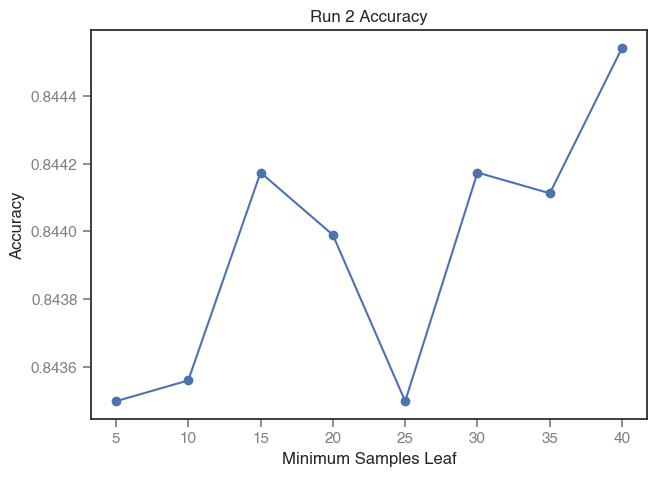

In [45]:
#create line-graph for accuracy of 4un 2
plt.plot(run2_df["Minimum Sample Leaf"], run2_df["Accuracy"], marker='o', linestyle='-', color='b')
plt.title("Run 2 Accuracy")
plt.xlabel("Minimum Samples Leaf")
plt.ylabel("Accuracy")
plt.show()

In our second run, we determined that the minimum sample leaf hyperparameter value of 40 has the highest accuracy score at 84.45%. This helps us fine tune that parameter as we move forward to run 3, maximum features. 

In [47]:
#Run 3: Maximum Features: auto, none, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8

max_features_list = ['auto', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

run3 = []

for max_feat in max_features_list: 
    if max_feat == 'auto':
        max_feat_param = 'sqrt'
    else:
        max_feat_param = max_feat
    dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 101,
        max_features = max_feat_param, min_samples_leaf = 40)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    run3.append([max_feat, accuracy, recall, precision, f1])
    run3_df = pd.DataFrame(run3, columns = ['Maximum Features','Accuracy', 'Recall', 'Precision', 'F1 Score'])

run3_df

,Maximum Features,Accuracy,Recall,Precision,F1 Score
0,auto,0.843560,0.573063,0.708910,0.633789
1,None,0.844543,0.552782,0.723868,0.626861
2,0.3,0.839322,0.577743,0.691350,0.629462
3,0.4,0.843560,0.573063,0.708910,0.633789
4,0.5,0.842700,0.580603,0.701981,0.635549
5,0.6,0.842332,0.570723,0.705561,0.631019
6,0.7,0.844174,0.574883,0.710247,0.635436
7,0.8,0.845403,0.563963,0.720837,0.632823


In [48]:
run3_df.sort_values(by='Accuracy',ascending=False)

,Maximum Features,Accuracy,Recall,Precision,F1 Score
7,0.8,0.845403,0.563963,0.720837,0.632823
1,None,0.844543,0.552782,0.723868,0.626861
6,0.7,0.844174,0.574883,0.710247,0.635436
0,auto,0.843560,0.573063,0.708910,0.633789
3,0.4,0.843560,0.573063,0.708910,0.633789
4,0.5,0.842700,0.580603,0.701981,0.635549
5,0.6,0.842332,0.570723,0.705561,0.631019
2,0.3,0.839322,0.577743,0.691350,0.629462


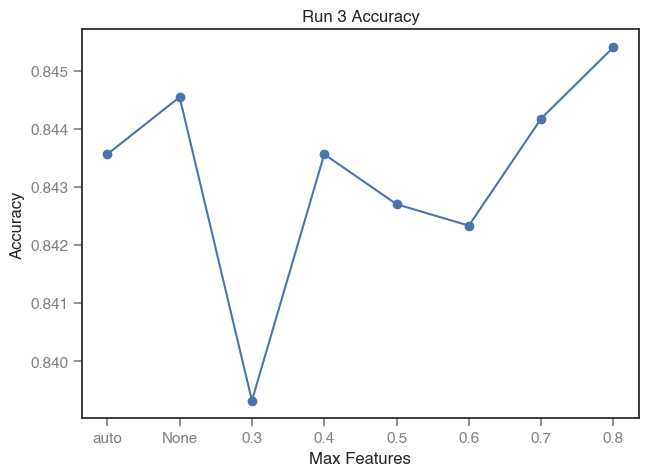

In [49]:
#create line-graph for accuracy of run3
run3_df["Maximum Features"] = run3_df["Maximum Features"].astype(str).replace("None", "None")
plt.plot(run3_df['Maximum Features'], run3_df["Accuracy"], marker='o', linestyle='-', color='b')
plt.title("Run 3 Accuracy")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.show()

Based on our third run, which determined the max number of features to consider for the decision tree model, our best performing model used 0.80 as the most accurate result with 84.54%. We will continue to use the previously determined best model parameters, and add the results from run3 into our final run, maximum depth. 

In [51]:
#Run 4: Maximum Depth - 2, 4, 6, 8, 10, 12, 14, 16

max_depth_list = [2, 4, 6, 8, 10, 12, 14, 16]

run4 = []

for depth in max_depth_list: 
    dtree = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = depth,
                                   random_state = 101, 
                                   max_features = 0.8,
                                   min_samples_leaf = 40)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    run4.append([depth, accuracy, recall, precision, f1])
    run4_df = pd.DataFrame(run4, columns = ['Maximum Depth','Accuracy', 'Recall', 'Precision', 'F1 Score'])

run4_df

,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,2,0.821755,0.406916,0.715919,0.518899
1,4,0.834592,0.513261,0.706261,0.594489
2,6,0.843744,0.562663,0.715135,0.629802
3,8,0.845280,0.558502,0.723476,0.630374
4,10,0.845403,0.563963,0.720837,0.632823
5,12,0.843929,0.553822,0.720812,0.626378
6,14,0.844911,0.544982,0.730059,0.624088
7,16,0.845648,0.584503,0.710718,0.641461


In [52]:
run4_df.sort_values(by='Accuracy',ascending = False)

,Maximum Depth,Accuracy,Recall,Precision,F1 Score
7,16,0.845648,0.584503,0.710718,0.641461
4,10,0.845403,0.563963,0.720837,0.632823
3,8,0.845280,0.558502,0.723476,0.630374
6,14,0.844911,0.544982,0.730059,0.624088
5,12,0.843929,0.553822,0.720812,0.626378
2,6,0.843744,0.562663,0.715135,0.629802
1,4,0.834592,0.513261,0.706261,0.594489
0,2,0.821755,0.406916,0.715919,0.518899


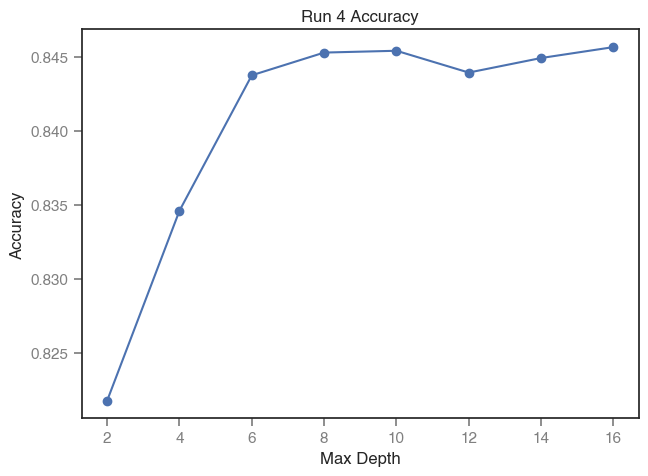

In [53]:
#create line graph for accuracy of run 4
plt.plot(run4_df['Maximum Depth'], run4_df["Accuracy"], marker='o', linestyle='-', color='b')
plt.title("Run 4 Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

Per our 4 runs, we have determined that the best decision tree model has the following main hyperparameters (based on accuracy score):
- Split Criteria = 'Entropy'
- Minimum Sample Leaf of 40
- Maximum Features of 0.8
- Maximum Depth of 16

Using these hyperparameters helps us achieve a maximum possible accuracy score of 84.56%. 

Step 6: Decision Tree Visualization

In [55]:
#run the final best decision tree for visualization 

optimal_dtree = DecisionTreeClassifier(criterion = 'entropy',
                                       max_depth = 16,
                                       random_state = 101, 
                                       max_features = 0.8,
                                       min_samples_leaf = 40)
optimal_dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=0.8,
                       min_samples_leaf=40, random_state=101)

Now, we will use the code guidelines from the Medium article for using GraphViz to visualize our optimal decision tree. 

In [57]:
import graphviz

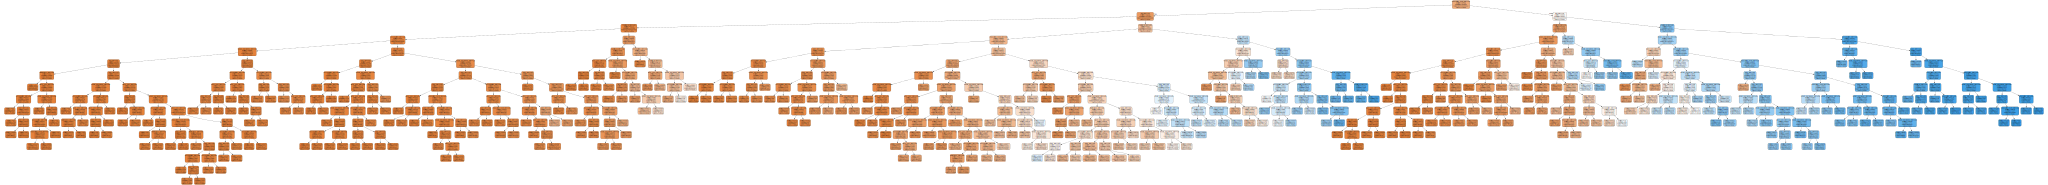

In [58]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(optimal_dtree, out_file=None, feature_names=x_train.columns,
                           class_names=["<=50K", ">50K"], filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph

Since this graph is not optimal, we will use matplot lib as an alternative to help further with the visualization. The code below creates a png for improved visualization. 

In [60]:
import graphviz
from sklearn.tree import export_graphviz

# Export the tree with better scaling for readability
dot_data = export_graphviz(optimal_dtree, out_file=None, feature_names=x_train.columns,
                           class_names=["<=50K", ">50K"], filled=True, rounded=True)

# Create a Graphviz object
graph = graphviz.Source(dot_data, format="png")  # Set output format to PNG

# Save and open the image externally
graph.render("decision_tree", view=True)  # Saves and automatically opens the file

'decision_tree.png'

Step 7: Conclusion

Q4: How long was your total run time to train the best model?

In [62]:
#measuring total run time using built-in time features in Python 
start_time = time.time()
optimal_dtree.fit(x_train,y_train)
end_time = time.time()
total_runtime = end_time - start_time
print(f'Total Run Time: {total_runtime} seconds')

Total Run Time: 0.01714801788330078 seconds


The total runtime was 0.06 seconds, which is an extremely efficient model. 

Q5: Did you find the best tree? 

Yes, the best tree was found through our separate 4 runs through different hyperparameters. We selected the most accurate model for each of the 4 hyperparameters, split, min samples, max features, and max depth. All together, this provides the optimal, and most accurate, decision tree model. 

Q6: Write your observations from the bisualization of the best tree. 

This decision tree model is a little difficult to read, especially due to its complexity. We first see that the model splits into multiple nodes at various levels, suggesting that the decision to break-off from each node is very complex and refined. Furthermore, the actual high depth of the model also suggests a complex model. 

With that being said, in order to reduce the risk of overfitting it may be important for the tree to be "trimmed" or simplified. In the essence of simplication, the actual depth of min samples leaf could be reduced drastically, while not drastically impacting the strength of accuracy for the model. 

Q7: Will this tree "overfit"?

From a visual perspective, there is the potential that the model completely overfits the data set since it is awfully "grown". The amount of nodes, high max depth, and complex splits demonstrates that by prioritizing the accuracy score of each hyperparameter, the model may not be accurate for testing, just for training. 

Using AI suggestions for coding and our already integrated accuracy score from skitlearn, we can statistically analyze the potential for overfitting as follows.

In [64]:
y_train_pred = optimal_dtree.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = optimal_dtree.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy > test_accuracy > 0.05: #the threshold for statistical significance is a difference greater than 0.05 or 5%
    print('Overfitting likely since training accuracy is significantly higher than test accuracy.')
else:
    print('No statistically significant overfitting likely.')

Training Accuracy: 0.8468
Test Accuracy: 0.8456
Overfitting likely since training accuracy is significantly higher than test accuracy.


We also come to statistical determination that the model is overfitting, since training accuracy is more than 0.05 greater than test accuracy. 

Step 8: Prediction using your "trained" Decision Tree Model

In [152]:
new_individual = pd.DataFrame({
    'hours_per_week_bin': [48],
    'occupation_bin': ['Mid - Low'],
    'msr_bin': ['High'],
    'capital_gl_bin': ['Yes'],
    'race_sex_bin': ['Mid'],
    'education_num_bin': [12],
    'education_bin': ['High'],
    'workclass_bin': ['Income'],
    'age_bin': [58]
})

In [170]:
#categorize into bin according to the specifications from the og dataset

new_individual = pd.DataFrame({
    'hours_per_week_bin': ['b. 31-40'],
    'occupation_bin': ['b. Mid - Low'],
    'msr_bin': ['c. High'],
    'capital_gl_bin': ['c. > 0'],
    'race_sex_bin': ['b. Mid'],
    'education_num_bin': ['b. 9-12'],
    'education_bin': ['e. High'],
    'workclass_bin': ['b. income'],
    'age_bin': ['d. 36-40 & 56-60']
})

print(new_individual)

  hours_per_week_bin occupation_bin msr_bin  capital_gl_bin race_sex_bin  \
0      b. 31-40       b. Mid - Low   c. High     c. > 0        b. Mid      

  education_num_bin education_bin workclass_bin      age_bin       
0       b. 9-12         e. High      b. income   d. 36-40 & 56-60  


In [172]:
#use the same label encoding prior to training to format the dataset
for col in new_individual.columns:
    if col in label_encoders: 
        new_individual[col] = label_encoders[col].transform(new_individual[col])
    else:
        print('error')

In [176]:
predicted_income = optimal_dtree.predict(new_individual)

print(predicted_income)

[1]


Since the output was one, we can predict that the income is greater than $50,000, per our decision tree model. 

Q8: What is the probability that your prediction for this person is correct? 

In [180]:
#we will get the probability score using our probability predictor 

prob = optimal_dtree.predict_proba(new_individual)

print(prob)

[[0.3125 0.6875]]


This results displays that the model was 68.75% confident that the preson earns more than 50k a year, which means the probability that it is incorrect could be 31.25%, which is what the model determined is the prob that they make = to or less than 50k. 